# Exploratory Data Analysis (EDA)

In [ ]:
# Load Data
import sys
import os
sys.path.append(os.path.abspath('../src'))

import pandas as pd
from data_ingestion import ingest_data
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

fault_data_path = '../data/raw/fault_data.csv'
scada_data_path = '../data/raw/scada_data.csv'
status_data_path = '../data/raw/status_data.csv'

# Load the CSV files
df_fault = ingest_data(fault_data_path)
df_scada = ingest_data(scada_data_path)
df_status = ingest_data(status_data_path)

In [13]:
# Convert data columns to datetime format
df_status['Time'] = pd.to_datetime(df_status['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
df_scada['DateTime'] = pd.to_datetime(df_scada['DateTime'], format='%m/%d/%Y %H:%M', errors='coerce')
df_fault['DateTime'] = pd.to_datetime(df_fault['DateTime'], errors='coerce')

Direct EDA on SCADA Data

In [14]:
# Perform descriptive statistics
scada_stats = df_scada.describe()

# Display the descriptive statistics
print("Descriptive Statistics for SCADA Data:")
print(scada_stats)

Descriptive Statistics for SCADA Data:
                            DateTime          Time         Error  \
count                          49027  4.902700e+04  49027.000000   
mean   2014-10-19 18:19:49.915760640  1.413762e+09      0.938748   
min              2014-05-01 00:00:00  1.398920e+09      0.000000   
25%              2014-07-26 00:14:30  1.406352e+09      0.000000   
50%              2014-10-19 03:00:00  1.413706e+09      0.000000   
75%              2015-01-13 13:54:00  1.421179e+09      0.000000   
max              2015-04-09 00:00:00  1.428556e+09    246.000000   
std                              NaN  8.559693e+06     14.442141   

       WEC: ava. windspeed  WEC: max. windspeed  WEC: min. windspeed  \
count         49027.000000         49027.000000         49027.000000   
mean              6.874626             9.340286            12.244133   
min               0.000000             0.000000             0.000000   
25%               4.200000             5.800000             

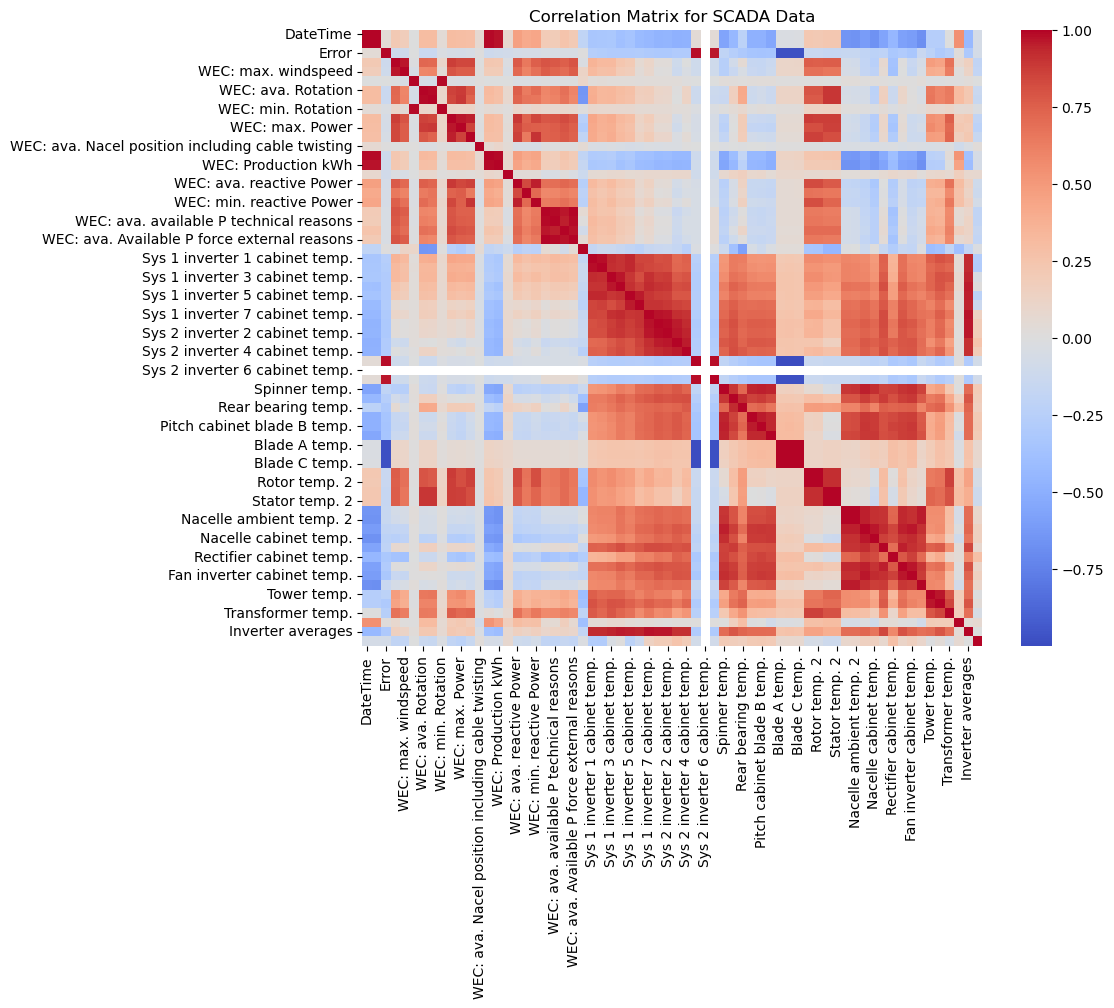

In [15]:
# Generate a correlation matrix
scada_corr = df_scada.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(scada_corr, annot=False, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix for SCADA Data")
plt.show()

Ydata-Profiling EDA Reports for Fault and Status Data

In [ ]:
# Fault Data Profile
profile_fault = ProfileReport(df_fault, title="Fault Data EDA Report", explorative=True)
profile_fault.to_file("fault_data_report.html")  # Save as HTML

In [ ]:
# Status Data Profile
profile_status = ProfileReport(df_scada, title="Status Data EDA Report", explorative=True)
profile_status.to_file("status_data_report.html")  # Save as HTML